In [1]:
# If you run this notebook on Google Colaboratory, uncomment the below to install automl_alex.
#!pip install automl-alex

In [1]:
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split

import automl_alex
print(automl_alex.__version__)

0.07.17


In [2]:
RANDOM_SEED = 42

# Classifier

## Data

In [3]:
from sklearn.datasets import fetch_openml
dataset = fetch_openml(name='credit-g', version=1, as_frame=True)
dataset.target = dataset.target.astype('category').cat.codes
dataset.data.head(5)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes


In [4]:
X_train, X_test, y_train, y_test = train_test_split(dataset.data, 
                                                    dataset.target,
                                                    test_size=0.2, 
                                                    random_state=RANDOM_SEED,)
X_train.shape, X_test.shape

((800, 20), (200, 20))

## Model

In [5]:
from automl_alex import LightGBMClassifier
model = LightGBMClassifier(X_train, y_train, X_test, 
    #cat_encoder_names=['HelmertEncoder', 'HashingEncoder', 'FrequencyEncoder'],
    random_state=RANDOM_SEED)

Source X_train shape:  (800, 20) | X_test shape:  (200, 20)
Auto detect cat features:  13
> Start preprocessing Data
> Generate cat encodet features
 +  55  Features from  OneHotEncoder
 +  44  Features from  HelmertEncoder
 +  54  Features from  HashingEncoder
 +  16  Features from  FrequencyEncoder
> Clean Nans in num features
> Generate interaction Num Features
 +  24 Interaction Features
##################################################
> Total Generated Features:  185
New X_train shape:  (800, 201) | X_test shape:  (200, 201)
##################################################


In [6]:
# fit_predict with default model parameters
predicts = model.predict()
print('Test AUC: ', round(sklearn.metrics.roc_auc_score(y_test, predicts['predict_test'][0]),4))

100%|██████████| 1/1 [00:12<00:00, 12.70s/it]
 Mean Score roc_auc_score on 30 Folds: 0.7456 std: 0.064317
Test AUC:  0.836



In [7]:
config = model.fit()
config


 Mean Score roc_auc_score on 5 Folds: 0.7142 std: 0.042548


,score_opt,model_score,score_std,model_name,model_param,wrapper_params,cat_encoder,columns,cv_folds
0,0.671652,0.7142,0.042548,LightGBM,"{'random_seed': 42, 'early_stopping_rounds': 5...",{'early_stopping': False},"[OneHotEncoder, HelmertEncoder, HashingEncoder...","[duration, credit_amount, age, num_dependents,...",10


In [8]:
model._data.X_train_source.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 29 to 102
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         800 non-null    category
 1   duration                800 non-null    float64 
 2   credit_history          800 non-null    category
 3   purpose                 800 non-null    category
 4   credit_amount           800 non-null    float64 
 5   savings_status          800 non-null    category
 6   employment              800 non-null    category
 7   installment_commitment  800 non-null    float64 
 8   personal_status         800 non-null    category
 9   other_parties           800 non-null    category
 10  residence_since         800 non-null    float64 
 11  property_magnitude      800 non-null    category
 12  age                     800 non-null    float64 
 13  other_payment_plans     800 non-null    category
 14  housing                 8

In [11]:
model._data.X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Columns: 201 entries, duration to credit_amount_+_duration
dtypes: float64(201)
memory usage: 1.2 MB


In [10]:
model._data.X_train

,duration,credit_amount,age,num_dependents,own_telephone,foreign_worker,HelmertEncoder_credit_history_0,HelmertEncoder_credit_history_1,HelmertEncoder_credit_history_2,HelmertEncoder_credit_history_3,...,GroupEncoder_duration_savings_status,GroupEncoder_duration_personal_status,GroupEncoder_duration_other_parties,GroupEncoder_duration_purpose,GroupEncoder_duration_existing_credits,GroupEncoder_duration_employment,GroupEncoder_duration_residence_since,GroupEncoder_duration_housing,GroupEncoder_duration_property_magnitude,GroupEncoder_duration_checking_status
0,3.297082,1.199912,2.406187,-0.409736,1.175139,-0.190445,-2.050355,-1.166648,-0.266320,-0.223313,...,-0.327421,0.829191,0.07828,1.700920,1.017777,0.336602,1.044509,-0.251833,1.587254,0.329248
1,-0.008051,-0.359630,-0.224364,-0.409736,-0.850963,-0.190445,1.363348,-1.166648,-0.266320,-0.223313,...,-0.327421,0.230319,0.07828,0.082793,-0.710931,-1.383466,-1.671440,-0.720582,0.580124,-2.558604
2,-1.279256,-0.733547,1.266282,-0.409736,-0.850963,-0.190445,-0.343504,0.933844,-0.266320,-0.223313,...,-1.444810,0.829191,0.07828,1.633794,-0.710931,-0.464563,1.044509,-0.720582,-0.333176,-0.643199
3,-0.008051,0.567050,-0.575104,-0.409736,1.175139,-0.190445,-0.343504,-0.466484,4.521460,-0.223313,...,1.395936,-0.897102,0.07828,-0.694665,1.017777,-0.464563,1.044509,-0.251833,-0.333176,-0.643199
4,-0.770774,-0.854388,-1.276585,-0.409736,-0.850963,-0.190445,-0.343504,0.933844,-0.266320,-0.223313,...,1.395936,-0.897102,0.07828,-0.221975,-0.710931,-0.464563,-0.766124,-0.251833,0.580124,-0.643199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,-0.262292,1.069404,0.301746,2.440599,1.175139,-0.190445,-0.343504,-0.466484,0.930625,4.478016,...,-0.327421,0.829191,0.07828,-0.694665,1.017777,0.336602,1.044509,-0.251833,1.587254,-0.643199
796,-0.262292,-0.241206,-0.312049,-0.409736,-0.850963,5.250850,-0.343504,0.933844,-0.266320,-0.223313,...,1.395936,0.829191,0.07828,-0.694665,-0.710931,1.812918,0.139192,-0.251833,-0.333176,-0.643199
797,0.246190,0.843603,-0.750474,-0.409736,-0.850963,-0.190445,1.363348,-1.166648,-0.266320,-0.223313,...,-2.181842,0.829191,0.07828,1.633794,1.017777,-0.464563,-0.766124,-0.251833,-1.312038,-0.643199
798,-0.770774,-0.647923,-0.925844,-0.409736,1.175139,-0.190445,-0.343504,0.933844,-0.266320,-0.223313,...,1.395936,-2.011266,0.07828,-0.221975,-0.710931,-0.464563,-1.671440,-0.251833,-1.312038,1.227410


In [11]:
res = model.cross_val(print_metric=True, predict=True, get_feature_importance=True,)


 Mean Score roc_auc_score on 20 Folds: 0.7491 std: 0.060184


In [15]:
pd.DataFrame.from_dict(res['Feature_importance'], orient='index').sort_values(by=[0])

,0
num_dependents,102.995884
OrdinalEncoder_foreign_worker,190.873434
OrdinalEncoder_other_parties,710.335044
OrdinalEncoder_existing_credits,1130.319228
OrdinalEncoder_own_telephone,1156.073312
OrdinalEncoder_job,1457.465226
OrdinalEncoder_housing,1623.045844
OrdinalEncoder_personal_status,1717.478801
OrdinalEncoder_other_payment_plans,1773.347982
OrdinalEncoder_residence_since,2717.721088


In [16]:
model.model.feature_importance()

array([406, 754, 498,   4,  95, 174, 210,  33, 100, 181,  10, 186, 228,
        61, 213, 145, 115,  82,  61, 172, 816, 737], dtype=int32)

In [17]:
model._data.encodet_features_names

['own_telephone',
 'installment_commitment',
 'residence_since',
 'other_parties',
 'job',
 'employment',
 'foreign_worker',
 'savings_status',
 'purpose',
 'other_payment_plans',
 'checking_status',
 'credit_history',
 'personal_status',
 'existing_credits',
 'housing',
 'property_magnitude']

In [8]:
X_train_fe, X_test_fe = model._data.preproc_data(model._data.X_train_source[model._data.encodet_features_names], 
                                                            model._data.X_test_source[model._data.encodet_features_names], 
                                                            cat_features=model._data.encodet_features_names,
                                                            cat_encoder_name='HelmertEncoder',
                                                            clean_nan=True,)

In [9]:
X_train_fe

,HelmertEncoder_savings_status_0,HelmertEncoder_savings_status_1,HelmertEncoder_savings_status_2,HelmertEncoder_savings_status_3,HelmertEncoder_credit_history_0,HelmertEncoder_credit_history_1,HelmertEncoder_credit_history_2,HelmertEncoder_credit_history_3,HelmertEncoder_purpose_0,HelmertEncoder_purpose_1,...,HelmertEncoder_employment_0,HelmertEncoder_employment_1,HelmertEncoder_employment_2,HelmertEncoder_employment_3,HelmertEncoder_job_0,HelmertEncoder_job_1,HelmertEncoder_job_2,HelmertEncoder_foreign_worker,HelmertEncoder_other_parties_0,HelmertEncoder_other_parties_1
0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,-1.0,-1.0
1,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,-1.0,-1.0
2,1.0,-1.0,-1.0,-1.0,0.0,2.0,-1.0,-1.0,0.0,2.0,...,0.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,-1.0,-1.0
3,0.0,2.0,-1.0,-1.0,0.0,0.0,3.0,-1.0,0.0,0.0,...,0.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,-1.0,-1.0
4,0.0,2.0,-1.0,-1.0,0.0,2.0,-1.0,-1.0,0.0,0.0,...,0.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,4.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,0,-1.0,-1.0
796,0.0,2.0,-1.0,-1.0,0.0,2.0,-1.0,-1.0,0.0,0.0,...,0.0,0.0,3.0,-1.0,-1.0,-1.0,-1.0,1,-1.0,-1.0
797,0.0,0.0,0.0,4.0,1.0,-1.0,-1.0,-1.0,0.0,2.0,...,0.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,-1.0,-1.0
798,0.0,2.0,-1.0,-1.0,0.0,2.0,-1.0,-1.0,0.0,0.0,...,0.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,-1.0,-1.0


### Optimize

In [8]:
history = model.opt(timeout=1000, verbose=1)

One iteration takes ~ 0.9 sec
Start Auto calibration parameters
Start optimization with the parameters:
CV_Folds =  10
Score_CV_Folds =  5
Opt_lvl =  3
Cold_start =  70.0
Early_stoping =  140.0
Metric =  roc_auc_score
Direction =  maximize
Default model OptScore = 0.6717
########################################
Optimize: : 408it [15:11,  1.31s/it,  | Model: LightGBM | OptScore: 0.7382 | Best roc_auc_score: 0.7668 +- 0.028581]
 EarlyStopping Exceeded: Best Score: 0.7382 roc_auc_score
Optimize: : 408it [15:11,  2.24s/it,  | Model: LightGBM | OptScore: 0.7382 | Best roc_auc_score: 0.7668 +- 0.028581]


In [9]:
hs = history.drop_duplicates(subset=['model_score', 'score_std'], keep='last').head(5)
hs

,score_opt,model_score,score_std,model_name,model_param,wrapper_params,cat_encoders,columns,cv_folds
266,0.7382,0.7668,0.028581,LightGBM,"{'random_seed': 42, 'early_stopping_rounds': 5...",{'early_stopping': False},"[OneHotEncoder, HelmertEncoder, HashingEncoder...","[duration, credit_amount, age, num_dependents,...",10
361,0.7379,0.7670,0.029096,LightGBM,"{'random_seed': 42, 'early_stopping_rounds': 5...",{'early_stopping': False},"[OneHotEncoder, HelmertEncoder, HashingEncoder...","[duration, age, num_dependents, OneHotEncoder_...",10
210,0.7334,0.7655,0.032069,LightGBM,"{'random_seed': 42, 'early_stopping_rounds': 5...",{'early_stopping': False},"[OneHotEncoder, HelmertEncoder, HashingEncoder...","[duration, credit_amount, age, num_dependents,...",10
270,0.7332,0.7638,0.030628,LightGBM,"{'random_seed': 42, 'early_stopping_rounds': 5...",{'early_stopping': False},"[OneHotEncoder, HelmertEncoder, HashingEncoder...","[duration, credit_amount, age, num_dependents,...",10
221,0.7326,0.7634,0.030791,LightGBM,"{'random_seed': 42, 'early_stopping_rounds': 5...",{'early_stopping': False},"[OneHotEncoder, HelmertEncoder, HashingEncoder...","[duration, credit_amount, age, num_dependents,...",10


In [10]:
predicts = model.predict()
print('Test AUC: ', round(sklearn.metrics.roc_auc_score(y_test, predicts['predict_test'][0]),4))

100%|██████████| 1/1 [00:04<00:00,  4.61s/it]
 Mean Score roc_auc_score on 30 Folds: 0.7776 std: 0.063278
Test AUC:  0.8387



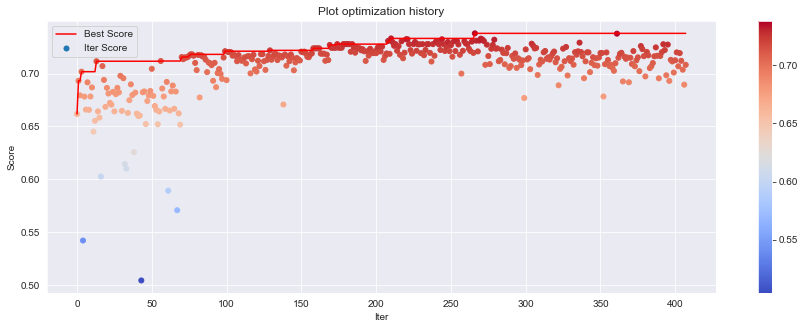

In [12]:
model.plot_opt_history()

# How it works
first let's look at all the parameters available to us     
для начала посмотрим все доступные нам параметры

```python
model = LightGBMClassifier(
    X_train, 
    y_train, 
    X_test, # be sure to specify X_test, because the encoder needs all dataset to work.
    cat_features=None, # see in 03. Data Cleaning and Encoding (DataBunch).ipynb
    clean_and_encod_data=True, # see in 03. Data Cleaning and Encoding (DataBunch).ipynb
    cat_encoder_name='OneHotEncoder', # see in 03. Data Cleaning and Encoding (DataBunch).ipynb
    clean_nan=True, # see in 03. Data Cleaning and Encoding (DataBunch).ipynb
    databunch=None, # see in 03. Data Cleaning and Encoding (DataBunch).ipynb
    model_param=None, # default model parameters
    wrapper_params=None, # default wrapper_params parameters
    auto_parameters=True, # automatic selection of optimization parameters
    cv=10, # Cross-validation folds
    score_cv_folds=5, # how many folds are actually used for score
    opt_lvl=3, # depth of selection of parameters
    metric=sklearn.metrics.roc_auc_score, # any metric from sklearn
    direction='maximize', # optimization direction
    combined_score_opt=True, # score_opt = score - std
    metric_round=4, 
    cold_start=150, # how many iterations the selection of parameters will be random
    gpu=False, 
    random_state=RANDOM_SEED,
    )
```
**Let's look at the important parameters and what they give.**

### *model_param*
parameters of the model itself. As you already understood, to work with the library itself, I use some kind of wrapper, but *model_param* pass the settings directly to the model itself

In [14]:
model.model_param

{'random_seed': 42,
 'early_stopping_rounds': 50,
 'num_iterations': 100,
 'verbose': -1,
 'device_type': 'cpu',
 'objective': 'binary',
 'min_child_samples': 5,
 'bagging_fraction': 0.5,
 'feature_fraction': 0.6000000000000001,
 'bagging_freq': 5,
 'learning_rate': 0.043,
 'num_leaves': 7}

### *wrapper_params*
Here we specify the settings of the wrapper. For example, for some algorithms (such as networks), we need to normalize the data. But this is not a reason to do it for the all dataset if we are opt various algorithms. For this reason, specifying *'need_norm_data': False* of the wrapper will automatically normalize the data (you can even choose normalization options)for this algorithm.

Здесь мы указываем настройки обертки. Например для некоторых алгоритмов (например сети) нам нужно проводить нормализацию данных. Но это не повод делать для всего датасета целиком если у нас происходит перебор различных алгоритмов. По этому указав *'need_norm_data': False* оберкта автоматически произведет нормализацию данных (можно даже выбрать варианты нормализации) именно для этого алгоритма.

In [15]:
model.wrapper_params

{'early_stopping': False}

### *metric* and *direction*
you can use standard metrics from sklearn.metrics or add custom metrics. Be sure to indicate the direction of improvement of the metric     

вы можете использовать стандартные метрики из sklearn.metrics или добавить кастомную. Обязательно указывайте направление улучшения метрики

## Optimization

```python
history = model.opt(
            timeout=100, # optimization time in seconds
            auto_parameters=None, # automatic selection of optimization parameters
            cv_folds=10, # Cross-validation folds
            score_cv_folds=5, # how many folds are actually used for score
            cold_start=None, # how many iterations the selection of parameters will be random
            opt_lvl=None, # depth of selection of parameters
            direction=None, # optimization direction
            early_stoping=100, # stop otimization if no better parameters are found through iterations
            cat_encoder_names=None,
            verbose=1,)
```

To optimize hyperparameters used Optuna (https://optuna.org), but with some modifications. Inside Optuna uses the TPE algorithm.

good visualization from: https://medium.com/criteo-labs/hyper-parameter-optimization-algorithms-2fe447525903
<img src="https://miro.medium.com/max/2000/1*m1JYCHHhbmn6TCHcJIklZA.gif" width="800">


### *cv* and *score_cv_folds*
In training, I use cross validation. But if we don’t have much time, then we go to the trick, and learn only part of the folds (score_cv_folds)    

В обучении я использую кросс валидацию. Но если у нас мало времени то мы идем на хитрость, и обучаемся только на части фолдов (score_cv_folds)


### *cold_start*
In the *cold_start* parameter, we specify how many iterations we give for this warm-up.
before the algorithm starts searching for optimal parameters, it must collect statistics on the represented space.this is why it starts in the randomsample solution at the beginning. The longer it works in this mode , the less likely it is to get stuck in the local minimum. But if you take too long to warm up, you may not have time to search with a more "smart" algorithm. Therefore, it is important to maintain a balance. 

перед тем как алгоритм начинает поиск оптимальных параметров, он должен собрать статистику по представляемому пространству, по этому в начале он запускаеться в решиме randomsample. Чем дольше он проработает в этом режиме - тем меньше вероятность что он застрянет в локальном минимуме. Но если слишком долго делать прогрев - то может не остаться времени на поиск с более "умным" алгоритмом. Поэтому важно соблюдать баланс. В параметре cold_start указываем сколько итераций мы даем на этот прогрев. 

### *opt_lvl*
by limiting the optimization time, we will have to choose how deep we should optimize the parameters. Perhaps some parameters are not so important and can only give a fraction of a percent. By setting the opt_lvl parameter, you control the depth of optimization.

in the code *automl_alex.models.model_lightgbm.LightGBM* you can find how parameters are substituted for iteration:

```python
....
def get_model_opt_params(self, trial):
    """
    Return:
        dict of DistributionWrappers
    """
    self._init_model_param()
    ################################# LVL 1 ########################################
    if self._opt_lvl == 1:
        self.model_param['num_leaves'] = trial.suggest_int('lgbm_num_leaves', 2, 50,)

    if self._opt_lvl >= 1:
        self.model_param['min_child_samples'] = trial.suggest_int('lgbm_min_child_samples', 2, \
                                                                    (len(self.X_train)//100))

    ################################# LVL 2 ########################################
    if self._opt_lvl == 2:
        self.model_param['learning_rate'] = trial.suggest_int('lgbm_learning_rate', 1, 11)/100
        self.model_param['num_leaves'] = trial.suggest_int('lgbm_num_leaves', 2, 50,)
        
        if not self.wrapper_params['early_stopping']:
            self.model_param['num_iterations'] = trial.suggest_int('lgbm_num_iterations', 1, 3,)*100

    if self._opt_lvl >= 2:
        self.model_param['bagging_fraction'] = trial.suggest_discrete_uniform('lgbm_bagging_fraction', 0.4, 1., 0.1)
        if self.model_param['bagging_fraction'] < 1.:
            self.model_param['feature_fraction'] = trial.suggest_discrete_uniform('lgbm_feature_fraction', 0.3, 1., 0.1)
            self.model_param['bagging_freq'] = trial.suggest_int('lgbm_bagging_freq', 2, 11,)
    
    ################################# LVL 3 ########################################
    if self._opt_lvl == 3:
        self.model_param['learning_rate'] = trial.suggest_int('lgbm_learning_rate', 1, 100)/1000
...
```

ограничивая время оптимизации, нам придется выбирать насколько глубоко мы должны оптимизировать параметры. Возможно некоторые параметры не так важны и могут дать лишь доли процента. Устанавливая параметр opt_lvl вы регулируете глубину оптимизации.

### *auto_parameters*
If we don't want to select anything, we just set *auto_parameters=True*. Then the algorithm itself will select, depending on the time allotted to it, the optimal values for:
* cv 
* score_cv_folds
* cold_start
* opt_lvl

Если мы не хотим ни чего подбирать, то просто устанавливаем auto_parameters=True. Тогда алгоритм сам подберет, в зависимости от выделенного ему времени, оптимальные значения этих параметров.

# Advanced Use

In [26]:
model = LightGBMClassifier(
    X_train, 
    y_train, 
    X_test,
    cv=10, # .fit_predict use cv to
    metric=sklearn.metrics.log_loss, # log_loss
    direction='minimize', # changed optimization direction for log_loss
    combined_score_opt=True, # in 'minimize' score_opt = score + std
    metric_round=4, 
    gpu=False, 
    random_state=RANDOM_SEED,
    )

In [27]:
predicts = model.predict()
print('Test metric: ', round(sklearn.metrics.log_loss(y_test, predicts['predict_test'][0]),4))

100%|██████████| 1/1 [00:05<00:00,  5.61s/it]
 Mean Score log_loss on 30 Folds: 0.8052 std: 0.191391
Test metric:  0.5521



## Advanced opt

In [28]:
history = model.opt(
            timeout=600, # sec
            auto_parameters=False, # try to set the rules ourselves
            cv_folds=10,
            score_cv_folds=3, # put 3 folds
            cold_start=50, # I plan > 200 iterations. 50 iterations are enough to evaluate the space
            opt_lvl=3,
            early_stoping=100, # stop otimization if no better parameters are found through iterations
            verbose=1,)

One iteration takes ~ 0.4 sec
Start optimization with the parameters:
CV_Folds =  10
Score_CV_Folds =  3
Opt_lvl =  3
Cold_start =  50
Early_stoping =  100
Metric =  log_loss
Direction =  minimize
Default model log_loss = 0.9878
########################################
Optimize: : 308it [05:30,  3.18it/s, LightGBM Best Score log_loss = 0.499 +- 0.029561]
 EarlyStopping Exceeded: Best Score: 0.5286 log_loss
Optimize: : 308it [05:30,  1.07s/it, LightGBM Best Score log_loss = 0.499 +- 0.029561]


In [29]:
predicts = model.predict()
print('Test metric: ', round(sklearn.metrics.log_loss(y_test, predicts['predict_test'][0]),4))

100%|██████████| 1/1 [00:01<00:00,  1.51s/it]
 Mean Score log_loss on 30 Folds: 0.5078 std: 0.05201
Test metric:  0.4595



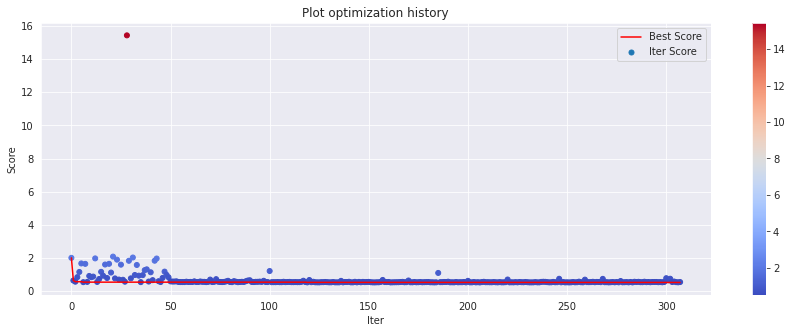

In [30]:
model.plot_opt_history()

## Predict from configs

In [ ]:
top5_models = history.drop_duplicates(subset=['model_score', 'score_std'], keep='last').head(10)
top5_models

In [15]:
predicts = model.predict(models_cfgs=top5_models)
predicts

10%|█         | 1/10 [00:04<00:40,  4.51s/it]
 Mean Score roc_auc_score on 30 Folds: 0.7776 std: 0.063278
 20%|██        | 2/10 [00:09<00:37,  4.72s/it]
 Mean Score roc_auc_score on 30 Folds: 0.774 std: 0.060926
 30%|███       | 3/10 [00:14<00:32,  4.71s/it]
 Mean Score roc_auc_score on 30 Folds: 0.7777 std: 0.061577
 40%|████      | 4/10 [00:19<00:28,  4.74s/it]
 Mean Score roc_auc_score on 30 Folds: 0.7761 std: 0.063811
 50%|█████     | 5/10 [00:24<00:24,  4.93s/it]
 Mean Score roc_auc_score on 30 Folds: 0.775 std: 0.062499
 60%|██████    | 6/10 [00:28<00:17,  4.50s/it]
 Mean Score roc_auc_score on 30 Folds: 0.7759 std: 0.064586
 70%|███████   | 7/10 [00:31<00:12,  4.20s/it]
 Mean Score roc_auc_score on 30 Folds: 0.7739 std: 0.065447
 80%|████████  | 8/10 [00:34<00:07,  3.83s/it]
 Mean Score roc_auc_score on 30 Folds: 0.7753 std: 0.064986
 90%|█████████ | 9/10 [00:38<00:03,  3.73s/it]
 Mean Score roc_auc_score on 30 Folds: 0.7755 std: 0.063077
100%|██████████| 10/10 [00:42<00:00,  4.

,model_name,predict_test,predict_train
0,266_LightGBM,"[0.30137806871141604, 0.3204165954525457, 0.44...","[0.473666674688144, 0.2687270158674308, 0.1935..."
1,361_LightGBM,"[0.2858666912235269, 0.3033307509880438, 0.425...","[0.42780458107563285, 0.27507058288082437, 0.2..."
2,210_LightGBM,"[0.2989361428474113, 0.30882841325368554, 0.38...","[0.3959299639160408, 0.287118880665522, 0.2392..."
3,270_LightGBM,"[0.29879792561386587, 0.3179338363733471, 0.44...","[0.47108666796064, 0.27347185063879126, 0.1924..."
4,221_LightGBM,"[0.2972660183363462, 0.3059494860016879, 0.364...","[0.3820445626548976, 0.28898189117816164, 0.25..."
5,271_LightGBM,"[0.29784433043502356, 0.3191954624703536, 0.45...","[0.47929616171545586, 0.2705360093417895, 0.18..."
6,279_LightGBM,"[0.2972557655648827, 0.31493746103838904, 0.43...","[0.4840681824828283, 0.27727119099328185, 0.19..."
7,267_LightGBM,"[0.29995588615319857, 0.3175249631527104, 0.44...","[0.474714658144213, 0.2753022541843128, 0.1936..."
8,272_LightGBM,"[0.2974208523560395, 0.31884717893888487, 0.46...","[0.49415327975941653, 0.26068540740900953, 0.1..."
9,208_LightGBM,"[0.30024487279123657, 0.3107560377007259, 0.38...","[0.3943182729913229, 0.285553801878309, 0.2402..."


In [16]:
print('Test AUC: ', round(sklearn.metrics.roc_auc_score(y_test, predicts['predict_test'].mean()),4))

Test AUC:  0.8378


In [35]:
print('Test metric: ', round(sklearn.metrics.log_loss(y_test, predicts['predict_test'].mean()),4))

Test metric:  0.4579
